In [1]:
import numpy as np
import pandas as pd
import os, subprocess, shutil
import matplotlib.pyplot as plt
import pyvista as pv
from myusefultools.parser import getVTKList
import xarray as xr

REPO_PATH = subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('utf-8').strip()
plt.style.use(f'{REPO_PATH}/misc/edwin.mplstyle')

caseName   = "constantHead"
PATH_TO_VTK = f"{caseName}/VTK"

In [2]:
def get_mean_velocity() -> np.float64:

    ## Extract VTK results (this should be done with a probe but meh)
    all_vtk_paths = [os.path.join(PATH_TO_VTK, f) for f in getVTKList(PATH_TO_VTK)]
    last_vtk = all_vtk_paths[-1]
    mesh = pv.read(last_vtk)

    U = mesh['U']
    Uz = U[:,-1]
    meanU = np.average(Uz)
    #stdU = np.std(Uz)

    return meanU #(meanU, stdU)

In [105]:
def getAllMeshes(field:str):
    ## Extract VTK result (this should be done with a probe but meh)
    all_vtk_paths = [os.path.join(PATH_TO_VTK, f) for f in getVTKList(PATH_TO_VTK)]
    nTimes = len(all_vtk_paths)
    times = [float(t) for t in subprocess.check_output("foamListTimes", cwd=f"./{caseName}").decode("utf-8").splitlines() if t[0:2].isnumeric()]

    ## Use dimensions from the first VTK
    mesh = pv.read(all_vtk_paths[0])
    line = pv.Line(
        a:=[0, 0, mesh.bounds[5]],
        b:=[0, 0, mesh.bounds[2]])
    sample = mesh.sample_over_line(a,b)
    nPoints = len(sample[field])

    ## Initialize array to store data
    results = np.zeros([nPoints, nTimes])

    ## Extract field for each vtk field
    for t,vtk in enumerate(all_vtk_paths):
        mesh = pv.read(vtk)
        sample = mesh.sample_over_line(a,b)
        results[:,t] = sample[field]

    data = xr.DataArray(
        results, 
        dims=("z","t"), 
        coords={
            "z": sample.points[:,2], 
            "t": times})
 
    return data

In [161]:
## Careful with this gradient, might need a very fine mesh 
## to solve for such an abrupt change

scalarName = "tracer"
scalar = getAllMeshes(scalarName)

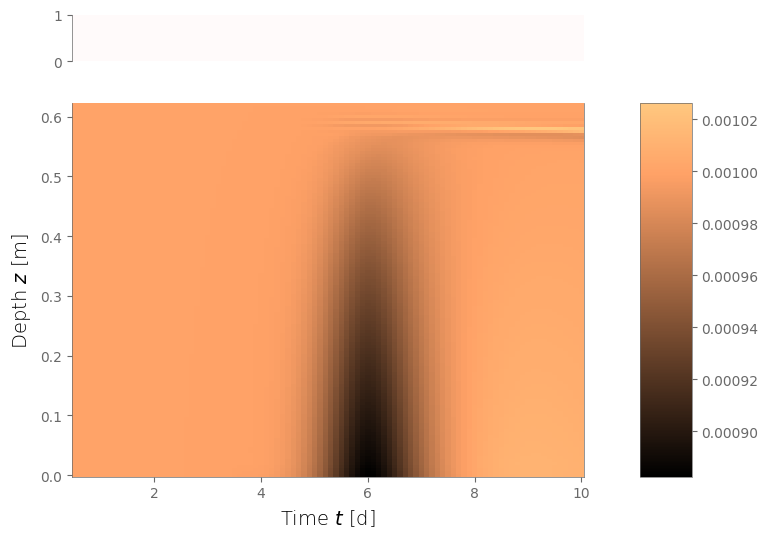

In [162]:
import matplotlib.colors as colors

fig, axs = plt.subplots(2,2, figsize=[8,6], gridspec_kw={"height_ratios":[0.5,4], "width_ratios":[5,0.5]}, sharex=False)
fig.set_facecolor("#ffffff00")

axs[0,1].remove()

ax = axs[0,0]
#ax.set(ylabel="Top $h$ BC (m)", xlabel="Time (d)") #, ylim=[-0.9,0], xlim=[0,3600])
ax.get_xaxis().set_visible(False)
ax.spines[["right","bottom"]].set_visible(False)

igt = 4  # Ignore the first timesteps for plor

ax = axs[1,0]
img = ax.pcolormesh(scalar.t[igt:]/86400, scalar.z, scalar[:,igt:], cmap="copper",
                    #norm=colors.LogNorm(vmin=max(scalar.min(),1.0E-5), vmax=scalar.max())
                    #norm=colors.LogNorm(vmin=scalar.min(), vmax=2.067E-4)
                    #vmin=0.000, vmax=0.001
                    )


ax.set_xlabel("Time $t$ [d]")
#ax.set_title(f"BC top = {hTop} m")
ax.set_ylabel("Depth $z$ [m]")
plt.colorbar(img, cax=axs[1,1])
plt.show()


In [93]:
scalar[:,0]

<xarray.DataArray (z: 125)>
array([ 1.00000005e-03,  1.00000005e-03,  1.00000005e-03,  1.00000005e-03,
        1.00000005e-03,  1.00000005e-03,  1.00000005e-03,  1.00000005e-03,
        1.00000005e-03,  1.00000005e-03,  1.00000005e-03,  1.00000005e-03,
        1.00000005e-03,  1.00000005e-03,  1.00000005e-03,  9.99999233e-04,
        9.99999000e-04,  9.99999349e-04,  1.00000005e-03,  1.00000005e-03,
        1.00000005e-03,  1.00000529e-03,  1.00000994e-03,  1.00001472e-03,
        1.00002182e-03,  1.00002869e-03,  1.00004731e-03,  1.00007420e-03,
        1.00010063e-03,  1.00013253e-03,  1.00018224e-03,  1.00024790e-03,
        1.00034068e-03,  1.00044138e-03,  1.00060250e-03,  1.00078108e-03,
        1.00103009e-03,  1.00133382e-03,  1.00187643e-03,  1.00214465e-03,
        1.00276596e-03,  1.00340659e-03,  1.00437296e-03,  1.00551231e-03,
        1.00700092e-03,  1.00859825e-03,  1.01077254e-03,  1.01368094e-03,
        1.01703091e-03,  1.01929926e-03,  1.02357194e-03,  1.02802529e-03,
        1.03823806e-03,  1.03866204e-03,  1.07282004e-03,  1.11255457e-03,
        1.20825879e-03,  2.07812293e-03,  1.20034034e-03, -1.22213227e-04,
        4.69794357e-03,  2.14956086e-02,  2.13128477e-02,  5.70712797e-02,
        1.02511942e-01,  2.35076576e-01,  5.95867097e-01,  1.25364709e+00,
        2.38244987e+00,  4.38429213e+00,  7.35039997e+00,  1.11315050e+01,
        1.23591585e+01,  1.08241787e+01,  7.07712317e+00,  3.17342424e+00,
        1.15741146e+00,  1.81780040e-01,  1.66202877e-02,  4.68378374e-03,
        3.48206493e-04,  1.81961368e-05,  5.32055356e-06,  3.88600085e-07,
        1.99652135e-08,  5.75704018e-09,  4.28518554e-10,  2.17271028e-11,
        7.01638140e-12,  4.84099848e-13,  2.35510599e-14,  9.10433702e-15,
        5.49612839e-16,  1.05674600e-16,  1.16748569e-17,  6.11713246e-19,
        2.08614059e-19,  1.41709529e-20,  2.25992408e-21,  3.07079064e-22,
        1.60052131e-23,  6.00521863e-24,  3.80641139e-25,  9.65129779e-26,
        8.77882549e-27,  8.10726084e-28,  1.95639166e-28,  1.02185916e-29,
        4.19279651e-30,  2.48355343e-31,  8.58638849e-32,  5.99067113e-33,
        1.66581123e-33,  1.43880176e-34,  3.02645112e-35,  3.45373320e-36,
        5.07762987e-37,  8.31943836e-38,  7.79921527e-39,  2.01870496e-39,
        1.14203022e-40,  4.94896579e-41,  2.39481908e-42,  1.25416213e-42,
        1.13505176e-43])
Coordinates:
  * z        (z) float32 0.62 0.615 0.61 0.605 0.6 ... 0.02 0.015 0.01 0.005 0.0
    t        float64 424.3